In [10]:
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from CCio import load_processed

from CCplot import auto_plot_style
from CCplot import plot1d
from CCplot import plot2d

In [11]:
%matplotlib inline

auto_plot_style()

In [8]:
def integrate(df, min=460, max=850, column="dquanta"):
    dfrange = df.loc[(df.em_wl >= min) & (df.em_wl < max)]
    column  = getattr(dfrange, column)
    return column.sum()    

In [17]:
folder_white = "/home/gonzalo/data/CC/testing/new_holders_nopaint_2021_06_30/"
folder_black = "/home/gonzalo/data/CC/testing/new_holders_painted_2021_06_24/"

data_white  = load_processed(folder_white).loc[lambda df: df.crystal == -7]
data_black  = load_processed(folder_black).loc[lambda df: df.crystal == -3]

datas = data_white, data_black

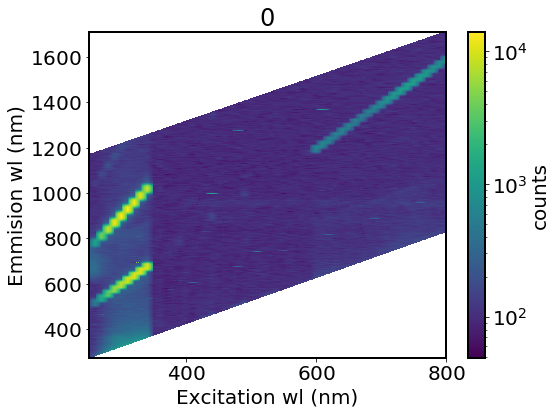

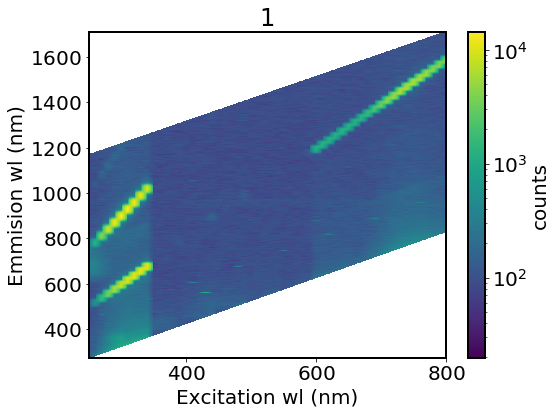

In [21]:
for i, data in enumerate(datas):
    plt.figure()
    plot2d(data.ex_wl, data.em_wl, np.abs(data.counts - 2500) + 1, title=str(i), log=True)

#    plt.savefig(f"data_{i}_2d.png")

/home/gonzalo/sw/anaconda3/envs/CC/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


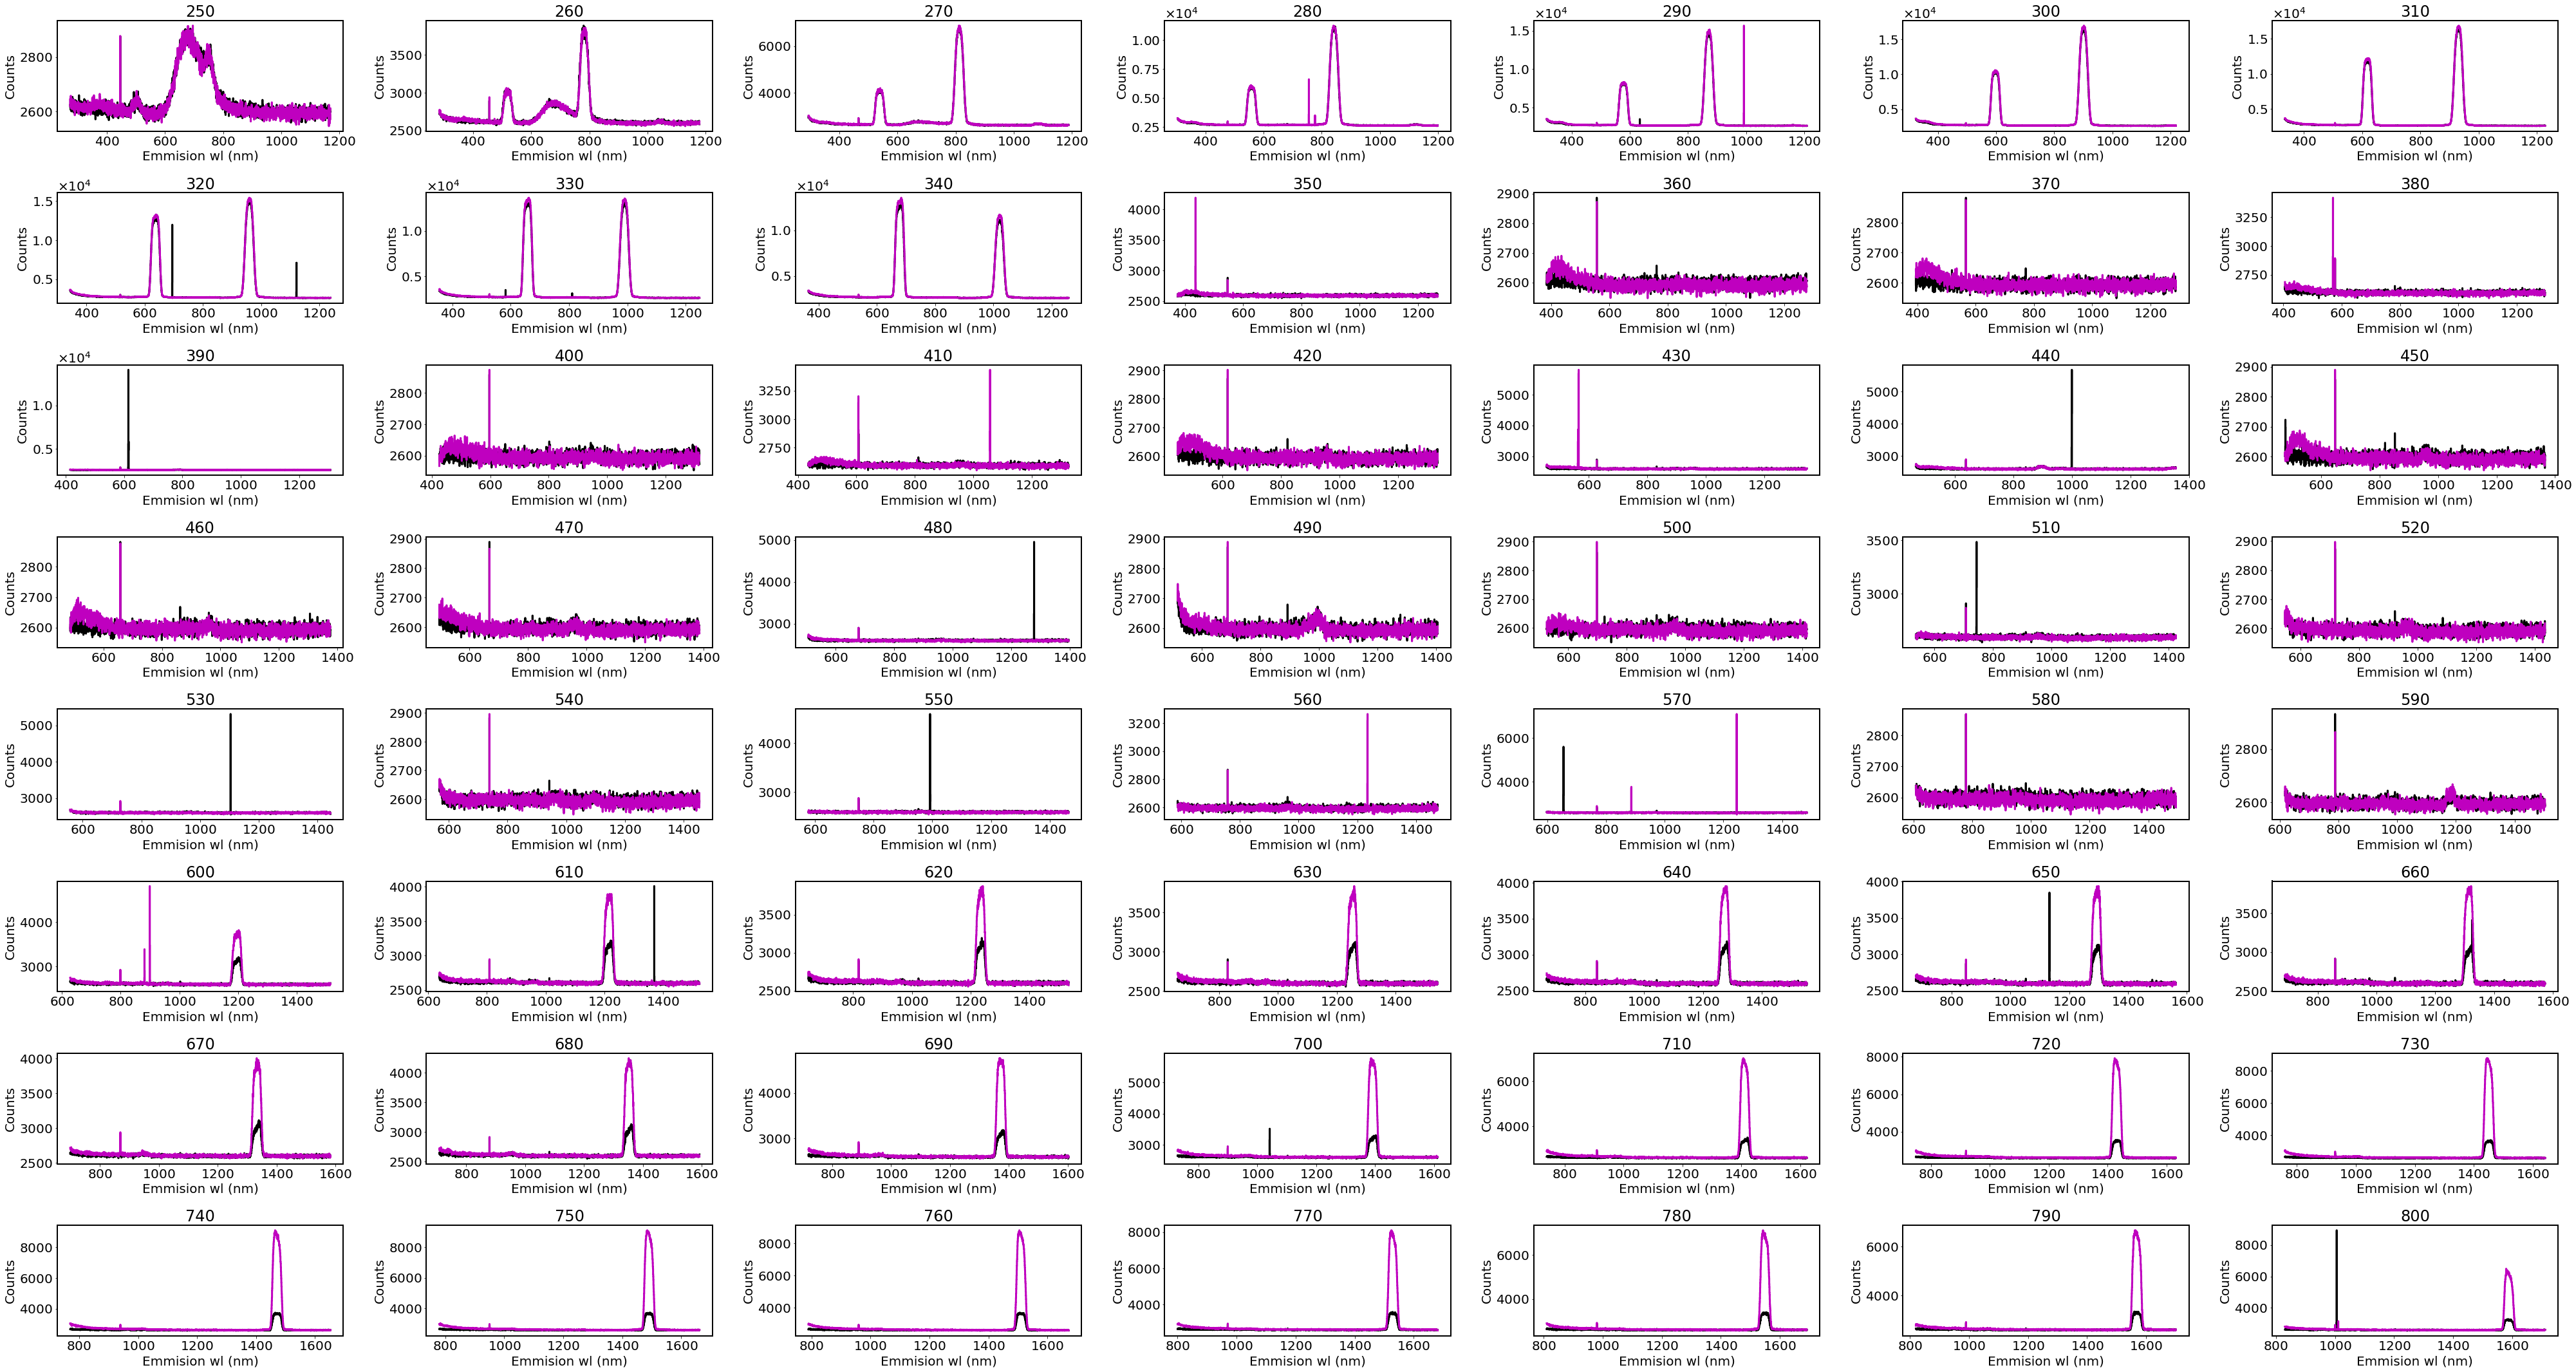

In [24]:
plt.figure(figsize=(8*7, 5*6))
for i, data in enumerate(datas):
    for exwl, ex in data.groupby("ex_wl"):
        plt.subplot(8, 7, (exwl - 240) // 10)
        plot1d(ex.em_wl, ex.counts, title=str(exwl))

plt.tight_layout()
#    plt.savefig(f"data_{i}_split.png")

In [23]:
plt.figure(figsize=(8*7, 5*6))

g5 = data_5.groupby("ex_wl")
g7 = data_7.groupby("ex_wl")

for exwl in sorted(data_5.ex_wl.drop_duplicates()):
    plt.subplot(8, 7, (exwl - 240) // 10)
    
    d5 = g5.get_group(exwl)
    d7 = g7.get_group(exwl)
    
    plot1d(d5.em_wl, d5.dquanta, color="m", title=str(exwl))
    plot1d(d7.em_wl, d7.dquanta, color="k")

plt.tight_layout()
#plt.savefig(f"quartz_paint.png")

NameError: name 'data_5' is not defined

<Figure size 4032x2160 with 0 Axes>

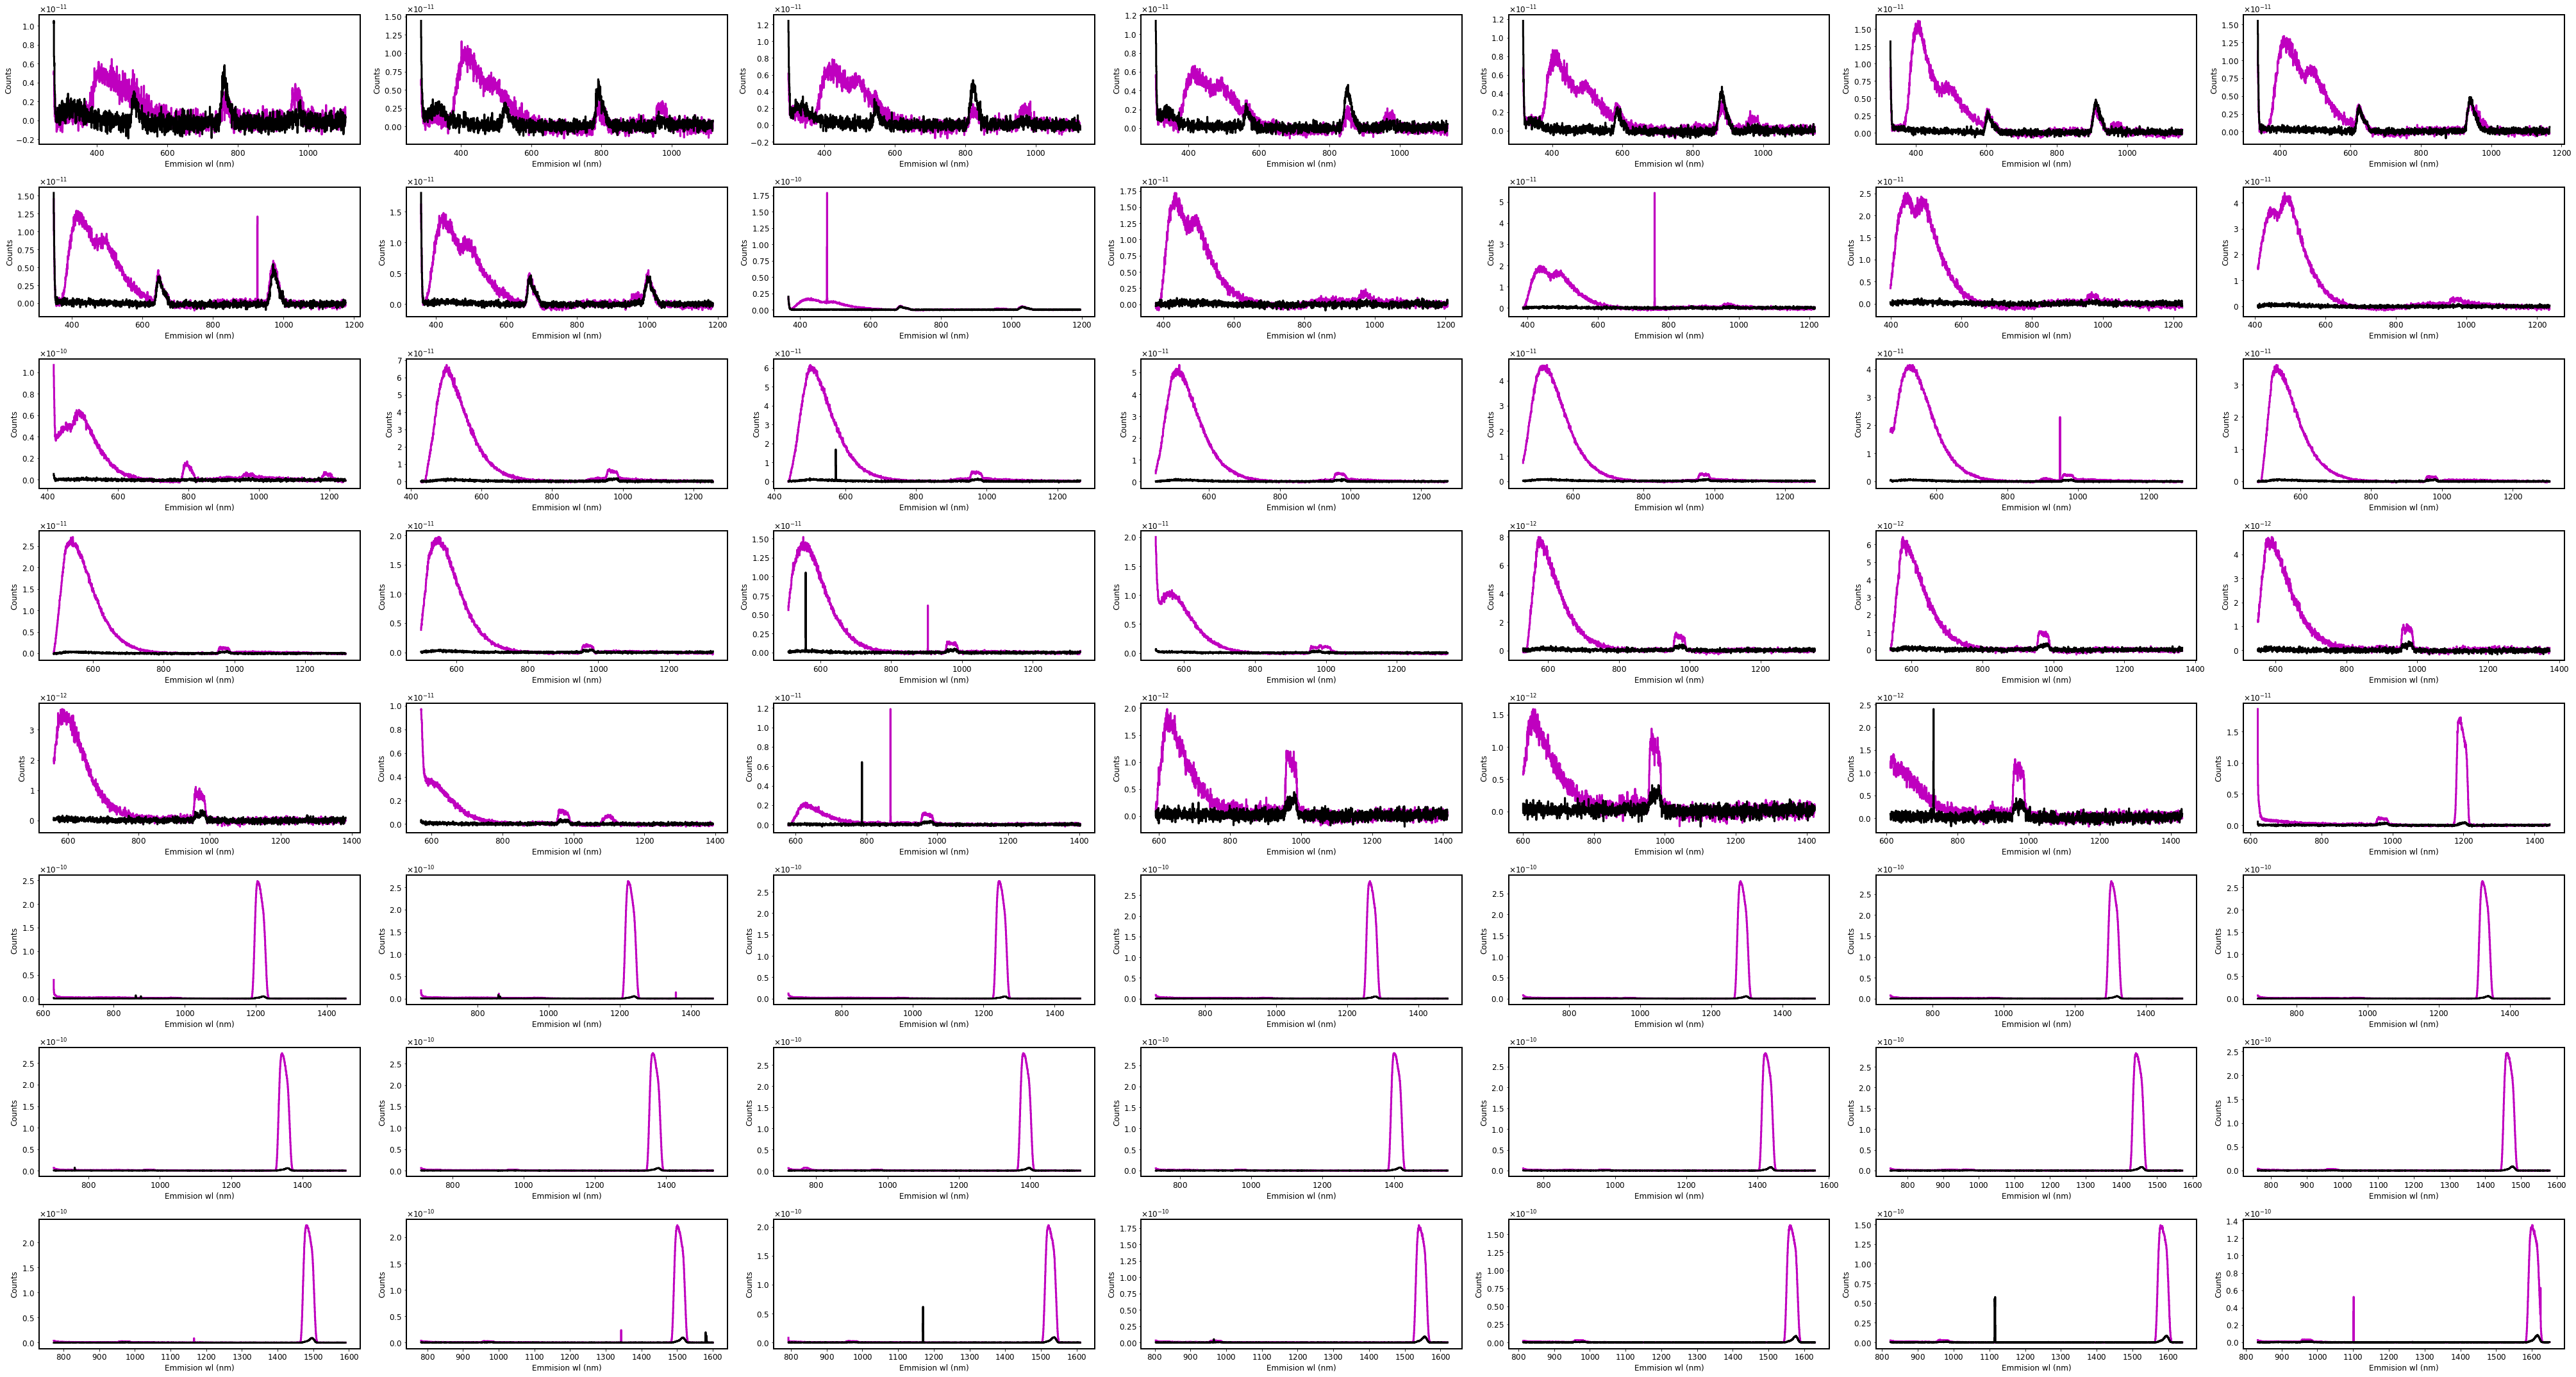

In [8]:
plt.figure(figsize=(8*7, 5*6))

g5 = data_5.groupby("ex_wl")
g7 = data_7.groupby("ex_wl")

for exwl in sorted(data_5.ex_wl.drop_duplicates()):
    plt.subplot(8, 7, (exwl - 240) // 10)
    
    d5 = g5.get_group(exwl)
    d7 = g7.get_group(exwl)
    
    plot1d(d5.em_wl, d5.dquanta, color="m", title=str(exwl))
    plot1d(d7.em_wl, d7.dquanta, color="k")

plt.tight_layout()
#plt.savefig(f"quartz_paint.png")

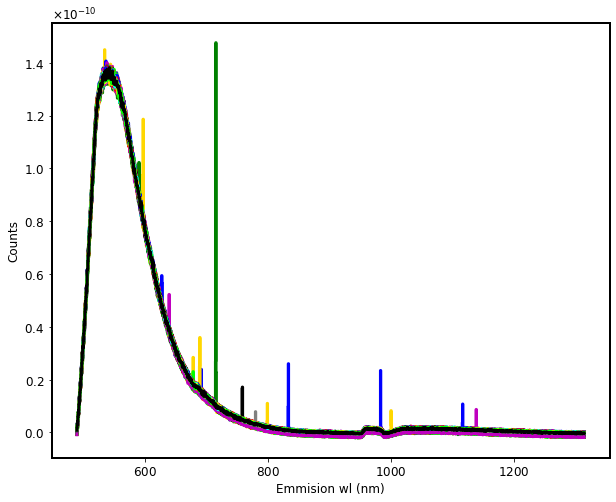

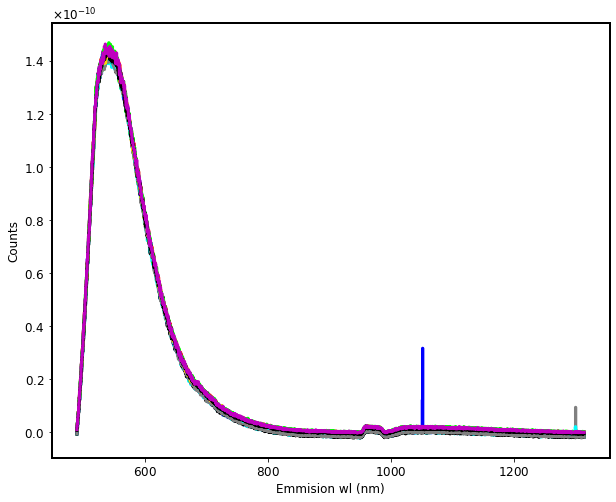

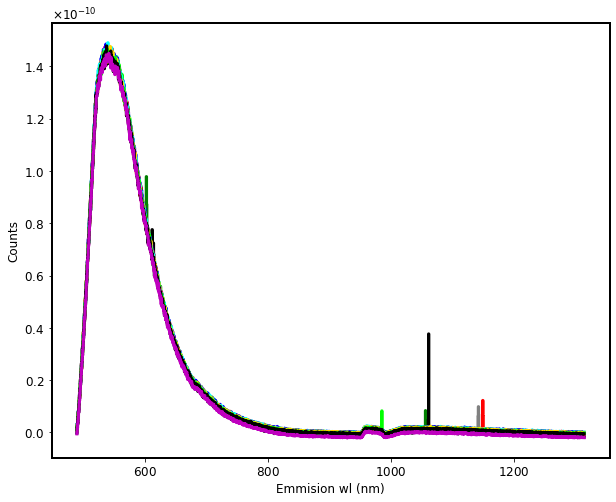

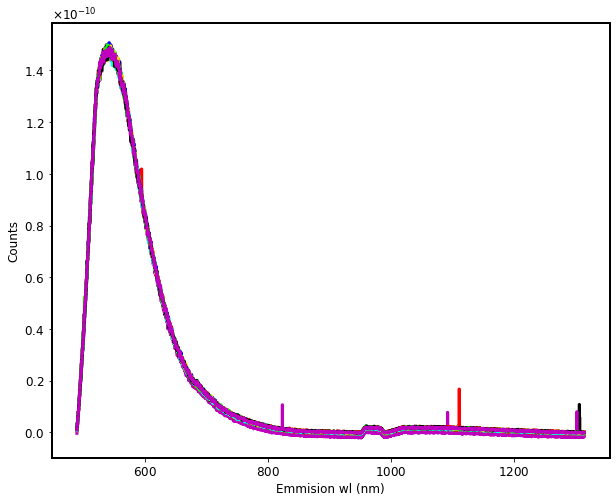

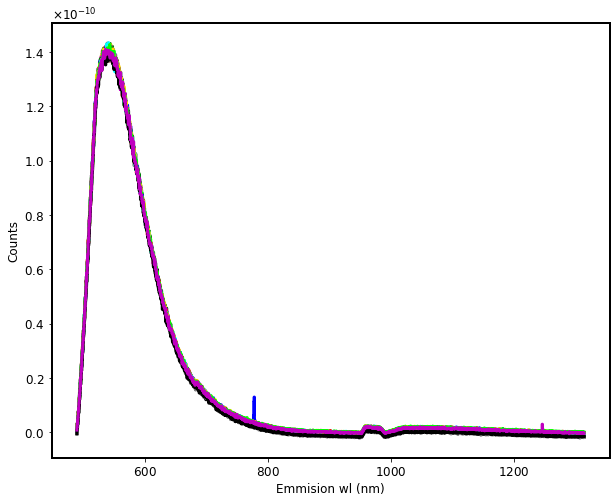

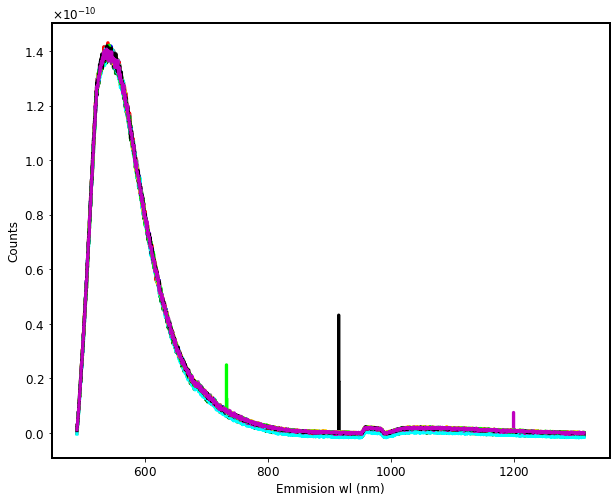

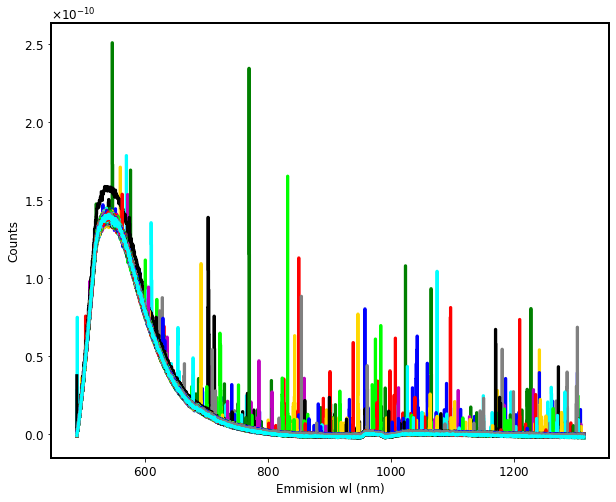

In [4]:
for data in datas:
    plt.figure()
    for _, d in data.groupby("state"):
        plot1d(d.em_wl, d.dquanta)

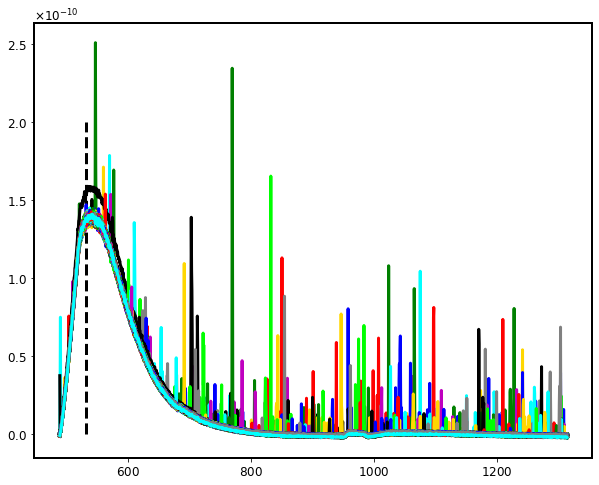

In [57]:
for _, state in data_6.groupby("state"):
    plt.plot(state.em_wl, state.dquanta);

plt.vlines(533, 0, 2e-10, linestyles="--")

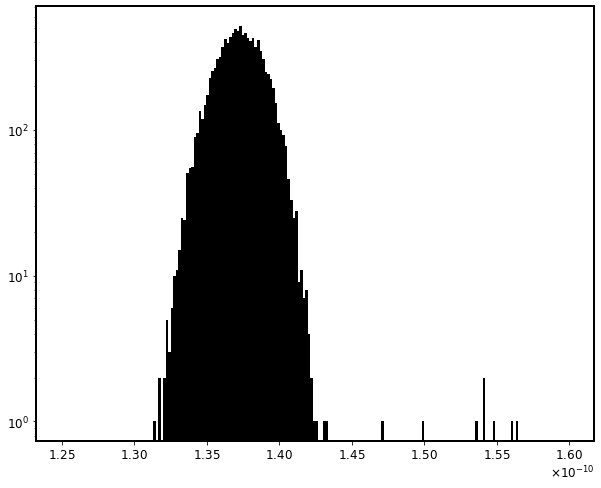

In [58]:
peak = data_6.loc[lambda x: (x.em_wl > 531) & (x.em_wl < 535)]
plt.hist(peak.dquanta, np.linspace(1.25e-10, 1.6e-10, 201))
plt.yscale("log")

In [41]:
integrals = data_6.groupby("state").apply(integrate, column="counts")

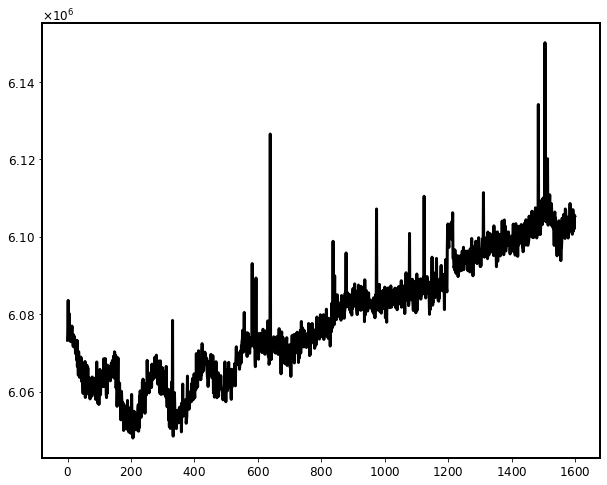

In [42]:
plt.plot(integrals)

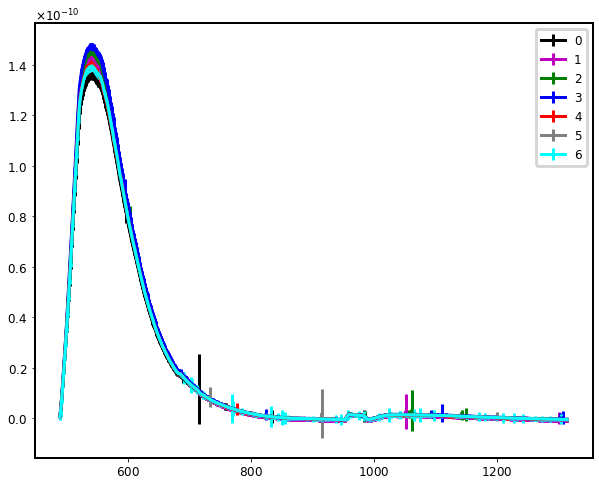

In [5]:
for i, data in enumerate(datas):
    df = data.groupby("em_wl", as_index=False).dquanta.agg(dict(mu="mean", sig="std"))
    plt.errorbar(df.em_wl, df.mu, df.sig, label=str(i))

plt.legend()

In [7]:
15*60/11*20

1636.3636363636363